### This is a  Regression & Classification project

A DATA SCIENCE APPROACH TO PROFILING ONLINE DATERS ACCORDING TO AGE & GENERATION
1. Can your dating profile predict your age?
2. Can your dating profile predict the generation you belong to? (Millennial, Gen X-er, or Boomers)

Using a dataset of almost 60,000 anonymized entries from the dating platform OKCupid, You will explore the above questions using supervised machine learning techniques. You will examine different aspects or features of user profiles and see which ones you will integrate into your models to achieve the most satisfactory scores. You will use regression techniques to tackle the first question and classification models to address the second.

By exploring the “last_online” feature’s min and max, the OKCupid dataset could be inferred to be dated around 2011 or 2012. At the time, a “Millennial” would be aged from 18 to 32, a “Gen X-er” 33 to 47, and “Boomers” from 48 to 70 years old.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
pd.set_option('display.max_rows', None)

In [9]:
df=pd.read_csv("profiles.csv")

### EDA

In [10]:
df.sample(5)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
28871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.duplicated().sum()

51037

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60552 entries, 0 to 60551
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    8666 non-null   object 
 2   diet         5761 non-null   object 
 3   drinks       9012 non-null   object 
 4   drugs        7215 non-null   object 
 5   education    8459 non-null   object 
 6   essay0       8667 non-null   object 
 7   essay1       8347 non-null   object 
 8   essay2       8049 non-null   object 
 9   essay3       7690 non-null   object 
 10  essay4       7879 non-null   object 
 11  essay5       7814 non-null   object 
 12  essay6       7352 non-null   object 
 13  essay7       7553 non-null   object 
 14  essay8       6361 non-null   object 
 15  essay9       7554 non-null   object 
 16  ethnicity    8565 non-null   object 
 17  height       9514 non-null   float64
 18  income       9514 non-null   float64
 19  job 

In [13]:
df.isnull().sum()

age            51038
body_type      51886
diet           54791
drinks         51540
drugs          53337
education      52093
essay0         51885
essay1         52205
essay2         52503
essay3         52862
essay4         52673
essay5         52738
essay6         53200
essay7         52999
essay8         54191
essay9         52998
ethnicity      51987
height         51038
income         51038
job            52369
last_online    51038
location       51038
offspring      56666
orientation    51038
pets           54200
religion       54291
sex            51038
sign           52776
smokes         51956
speaks         51044
status         51038
dtype: int64

# Data Visulation

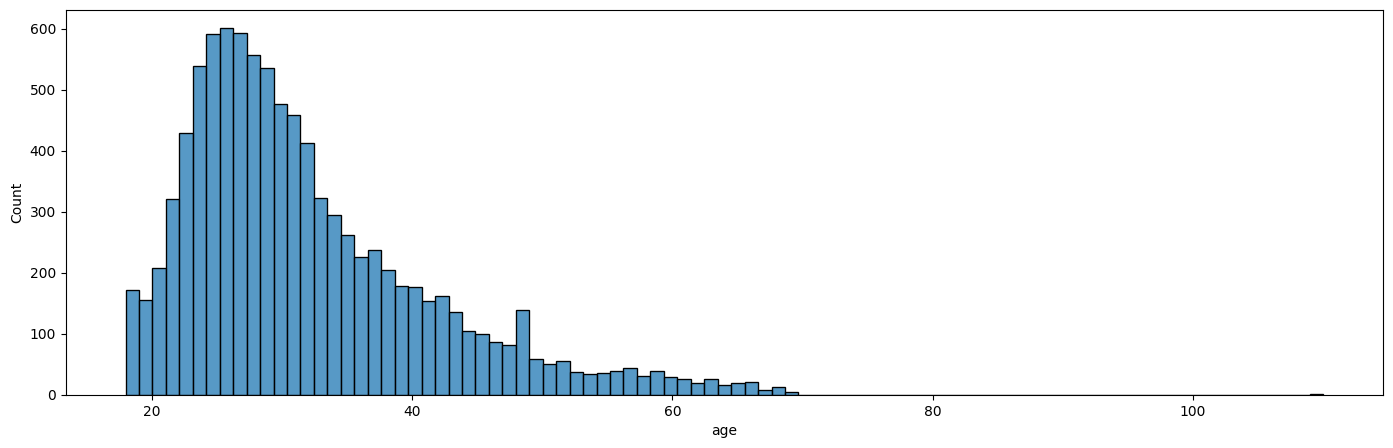

In [14]:
plt.figure(figsize=(17,5))
sns.histplot(x=df["age"]);

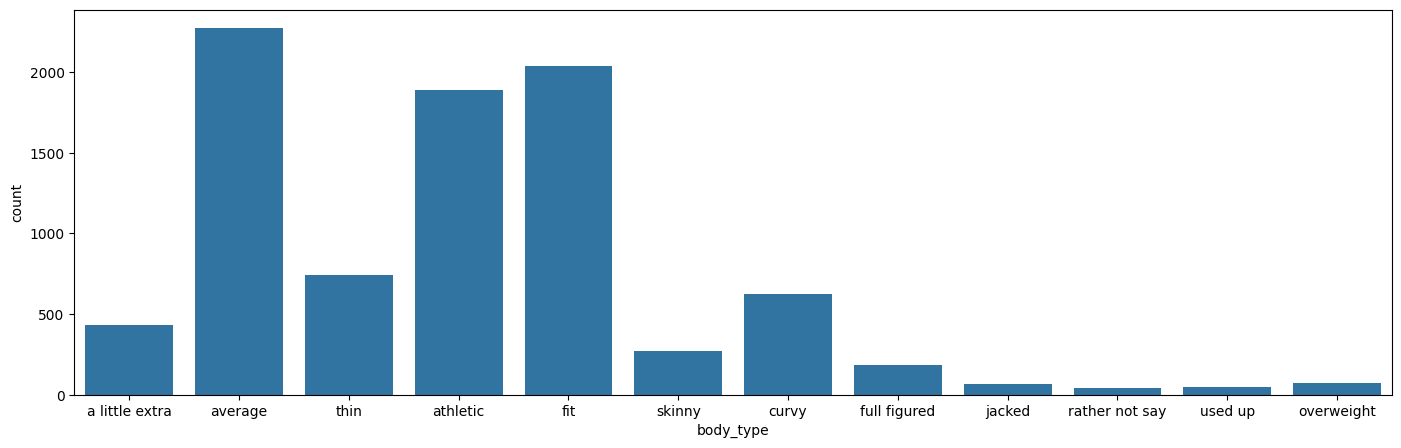

In [15]:
plt.figure(figsize=(17,5))
sns.countplot(x=df["body_type"]);

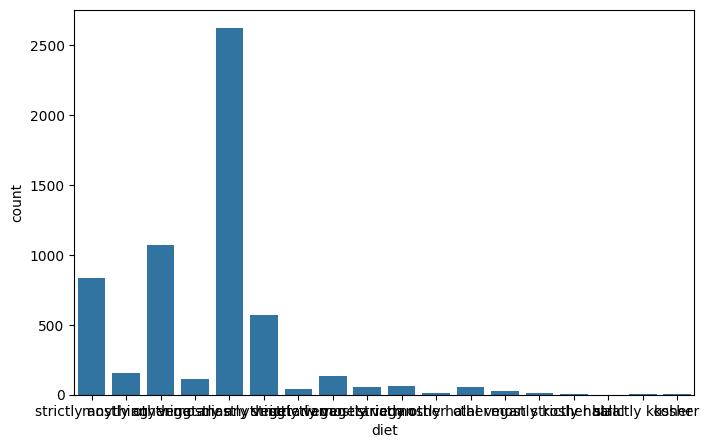

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["diet"]);

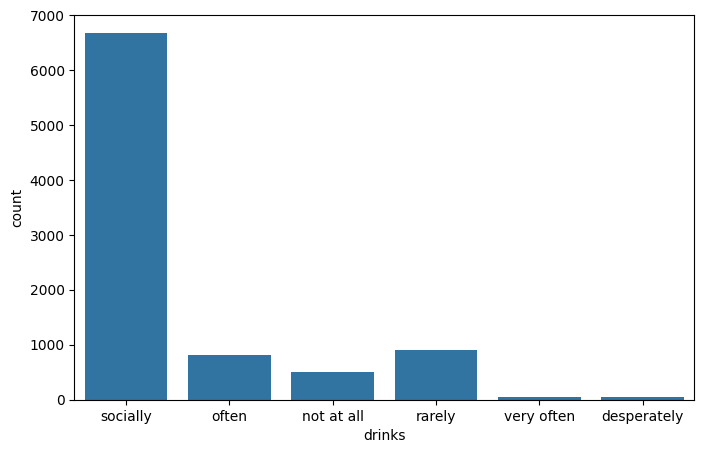

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["drinks"]);

# Feature Engineer

In [18]:
#Remove missing values.
#‘all’ : If all values are NA, drop that row
df.dropna(axis=0,how="all",inplace=True)

# After 9514 datas are NaN and deleted all NaN datas
#df=df.drop_duplicates()[:9514]

In [19]:
# Deleted all essay columns we dont need inf regration or clasifications
for i in df:
    if ("essay" in i):
        df.drop(i,axis=1,inplace=True)


df = df.drop(['job', 'ethnicity'], axis=1)

In [20]:
df.shape

(9514, 19)

In [21]:
df.sample(5)

,age,body_type,diet,drinks,drugs,education,height,income,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
7115,25.0,fit,mostly anything,socially,never,working on ph.d program,71.0,-1.0,2012-06-29-21-59,"san francisco, california",NaN,straight,NaN,NaN,f,NaN,no,english,available
2728,46.0,average,mostly anything,not at all,never,NaN,60.0,-1.0,2012-05-16-21-10,"san francisco, california",NaN,straight,NaN,other and somewhat serious about it,f,sagittarius,no,english (fluently),single
4487,28.0,fit,mostly vegetarian,socially,never,graduated from college/university,73.0,80000.0,2012-06-29-19-10,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,has dogs and likes cats,agnosticism,m,leo,no,"english (fluently), spanish (poorly)",single
4529,36.0,fit,mostly anything,socially,never,graduated from ph.d program,68.0,-1.0,2012-06-29-15-04,"san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,NaN,m,gemini and it&rsquo;s fun to think about,when drinking,"english (fluently), italian (fluently), spanis...",single
4039,18.0,average,NaN,socially,never,working on high school,67.0,-1.0,2012-06-29-16-09,"san francisco, california",wants kids,straight,likes dogs and likes cats,agnosticism,f,libra but it doesn&rsquo;t matter,sometimes,english,single


In [22]:
df.isnull().sum()

age               0
body_type       848
diet           3753
drinks          502
drugs          2299
education      1055
height            0
income            0
last_online       0
location          0
offspring      5628
orientation       0
pets           3162
religion       3253
sex               0
sign           1738
smokes          918
speaks            6
status            0
dtype: int64

In [23]:
df.body_type.value_counts()

average           2274
fit               2040
athletic          1888
thin               740
curvy              626
a little extra     430
skinny             269
full figured       181
overweight          69
jacked              64
used up             47
rather not say      38
Name: body_type, dtype: int64

In [24]:
# Data column field Cleaning
bodyTypes={"a little extra":"Endomorph",
           "curvy":"Endomorph",
           "full figured":"Endomorph",
           "rather not say":"Endomorph",
           "used up":"Endomorph",
           "overweight":"Endomorph",
           "average":"Ectomorph",
           "thin":"Ectomorph",
           "skinny":"Ectomorph",
           "athletic":"Mesomorph",
           "fit":"Mesomorph",
           "jacked":"Mesomorph"
}
df.body_type.replace(bodyTypes,inplace=True)

In [25]:
df.body_type.fillna("Mesomorph",inplace=True)

In [26]:
df.diet.value_counts()

mostly anything        2621
anything               1067
strictly anything       835
mostly vegetarian       568
mostly other            154
strictly vegetarian     135
vegetarian              111
strictly other           64
mostly vegan             52
other                    52
strictly vegan           40
vegan                    28
mostly halal             13
mostly kosher            12
strictly halal            4
strictly kosher           2
kosher                    2
halal                     1
Name: diet, dtype: int64

In [27]:
# Data column field Cleaning
dietStatus={"mostly":"","strictly":""}
df["diet"].replace(dietStatus,regex=True,inplace=True)
df["diet"]=df["diet"].str.strip()

df.diet.fillna("anything",inplace=True)

In [28]:
df.drinks.value_counts()

socially       6679
rarely          911
often           809
not at all      509
very often       54
desperately      50
Name: drinks, dtype: int64

In [29]:
df.drugs.value_counts()

never        5972
sometimes    1181
often          62
Name: drugs, dtype: int64

In [30]:
df.drinks.fillna("socially",inplace=True)

df.drugs.fillna("never",inplace=True)

In [31]:
df.education.value_counts()

graduated from college/university    3770
graduated from masters program       1402
working on college/university         969
working on masters program            251
graduated from two-year college       245
graduated from high school            205
graduated from ph.d program           203
graduated from law school             177
working on two-year college           159
working on ph.d program               159
dropped out of college/university     149
college/university                    134
graduated from space camp             104
dropped out of space camp              87
working on space camp                  73
graduated from med school              73
working on law school                  55
two-year college                       43
working on med school                  41
dropped out of two-year college        34
masters program                        21
working on high school                 20
dropped out of ph.d program            19
dropped out of masters program    

In [32]:
# Data column field Cleaning
df["education"].replace({"working on":"student","graduated from":"graduated","dropped out":"dropped"},regex=True)
df["education"]=df["education"].str.split().str[0]
df["education"].replace({"college/university":"student","two-year":"student","masters":"student",
                         "working":"student","space":"student","ph.d":"graduated","law":"graduated",
                         "high":"graduated"},regex=True,inplace=True)

df.education.fillna("graduated",inplace=True)

In [33]:
df.offspring.value_counts()

doesn&rsquo;t have kids                                1224
doesn&rsquo;t have kids, but might want them            620
doesn&rsquo;t have kids, but wants them                 578
doesn&rsquo;t want kids                                 454
has a kid                                               304
has kids                                                291
doesn&rsquo;t have kids, and doesn&rsquo;t want any     172
has kids, but doesn&rsquo;t want more                    68
has a kid, but doesn&rsquo;t want more                   41
has a kid, and might want more                           36
wants kids                                               29
might want kids                                          28
has kids, and might want more                            24
has a kid, and wants more                                12
has kids, and wants more                                  5
Name: offspring, dtype: int64

In [34]:
# Data column field Cleaning
offsprings=[]

for i in df.offspring.fillna("unknow").str.replace("[^\w\s]",""):
    if "doesn&rsquo" in i:
        offsprings.append("0")
    elif "unknow" in i:
        offsprings.append("0")
    else:
        offsprings.append("1")

df["offspring"]=offsprings

In [35]:
df.pets.value_counts()

likes dogs and likes cats          2314
likes dogs                         1152
has dogs                            683
likes dogs and has cats             674
has dogs and likes cats             384
likes dogs and dislikes cats        301
has dogs and has cats               226
has cats                            221
likes cats                          200
has dogs and dislikes cats           82
dislikes dogs and dislikes cats      42
dislikes dogs and likes cats         36
dislikes cats                        20
dislikes dogs and has cats           13
dislikes dogs                         4
Name: pets, dtype: int64

In [36]:
df["pets"].fillna("likes dogs and likes cats",inplace=True)

In [37]:
df.religion.value_counts()

agnosticism                                   448
other                                         417
agnosticism but not too serious about it      400
agnosticism and laughing about it             386
catholicism but not too serious about it      367
atheism                                       363
atheism and laughing about it                 329
other and laughing about it                   325
christianity but not too serious about it     320
christianity                                  297
other but not too serious about it            243
judaism but not too serious about it          232
atheism but not too serious about it          200
catholicism                                   165
atheism and somewhat serious about it         138
christianity and somewhat serious about it    133
other and somewhat serious about it           122
catholicism and laughing about it             117
judaism and laughing about it                 113
agnosticism and somewhat serious about it     105


In [38]:
# Data column field Cleaning
df["religion"]=df["religion"].str.split().str[0]

df["religion"].fillna("other",inplace=True)

In [39]:
df["last_online_year"]=2024-(df['last_online'].str[:4]).astype(int)
df["last_online_month"]=(df['last_online'].str[5:7]).astype(int)

del df["last_online"]

In [40]:
df.location.value_counts()

san francisco, california          4835
oakland, california                1181
berkeley, california                768
san mateo, california               207
palo alto, california               170
alameda, california                 155
san rafael, california              134
emeryville, california              117
redwood city, california            115
walnut creek, california            112
hayward, california                 112
menlo park, california               97
daly city, california                95
san leandro, california              94
vallejo, california                  90
richmond, california                 67
el cerrito, california               64
burlingame, california               63
novato, california                   59
mountain view, california            56
pleasant hill, california            53
south san francisco, california      53
stanford, california                 53
castro valley, california            51
pacifica, california                 48


In [41]:
# Data column field Cleaning
df.location=df.location.str.split(",").str[0]

In [42]:
df.sign.value_counts()

leo and it&rsquo;s fun to think about            277
taurus and it&rsquo;s fun to think about         275
gemini and it&rsquo;s fun to think about         271
cancer and it&rsquo;s fun to think about         260
scorpio and it&rsquo;s fun to think about        258
libra and it&rsquo;s fun to think about          257
virgo and it&rsquo;s fun to think about          257
pisces and it&rsquo;s fun to think about         253
aries and it&rsquo;s fun to think about          252
aries but it doesn&rsquo;t matter                250
aquarius but it doesn&rsquo;t matter             250
sagittarius and it&rsquo;s fun to think about    242
leo but it doesn&rsquo;t matter                  239
virgo but it doesn&rsquo;t matter                236
aquarius and it&rsquo;s fun to think about       235
gemini but it doesn&rsquo;t matter               235
cancer but it doesn&rsquo;t matter               233
taurus but it doesn&rsquo;t matter               222
sagittarius but it doesn&rsquo;t matter       

In [43]:
# Data column field Cleaning
df["sign"]=df["sign"].str.split().str[0]

df.sign.fillna("unknown",inplace=True)

In [44]:
df.sign.fillna("leo",inplace=True)

In [45]:
df.speaks.value_counts()

english                                                                                                  3415
english (fluently)                                                                                       1106
english (fluently), spanish (okay)                                                                        322
english (fluently), spanish (poorly)                                                                      321
english (fluently), spanish (fluently)                                                                    195
english, spanish                                                                                          133
english (fluently), french (poorly)                                                                       121
english, spanish (poorly)                                                                                 103
english, spanish (okay)                                                                                   102
english (f

In [46]:
# Data column field Cleaning
df["fluent_languages"]=df.speaks.str.count("fluently")
df["fluent_languages"].replace(0,1,regex=True,inplace=True)
df["poor_languages"]=df.speaks.str.count("poorly")

del df["speaks"]

In [47]:
df.fluent_languages.fillna(1,inplace=True)
df.poor_languages.fillna(0,inplace=True)

In [48]:
df["fluent_languages"]=df["fluent_languages"].astype(int)
df["poor_languages"]=df["poor_languages"].astype(int)

In [49]:
df.smokes.value_counts()

no                7011
sometimes          565
when drinking      480
yes                307
trying to quit     233
Name: smokes, dtype: int64

In [50]:
smokeDict={"no":0,"sometimes":1,"when drinking":1,"yes":1,"trying to quit":1}
df.smokes.replace(smokeDict,inplace=True)

In [51]:
df.smokes.fillna(0.0,inplace=True)
df["smokes"]=df.smokes.astype(int)

In [52]:
df.status.value_counts()

single            8909
seeing someone     289
available          270
married             46
Name: status, dtype: int64

In [53]:
df["status"].replace({"available":"single"},inplace=True)

In [54]:
df.age.value_counts()

26.0     601
27.0     593
25.0     591
28.0     557
24.0     539
29.0     536
30.0     476
31.0     459
23.0     429
32.0     412
33.0     323
22.0     320
34.0     295
35.0     262
37.0     237
36.0     226
21.0     207
38.0     204
39.0     178
40.0     176
42.0     161
20.0     156
41.0     153
43.0     136
19.0     113
44.0     104
45.0      99
46.0      86
47.0      81
49.0      71
48.0      68
18.0      58
50.0      58
52.0      55
51.0      51
57.0      43
56.0      39
59.0      39
53.0      38
55.0      36
54.0      34
58.0      31
60.0      29
63.0      26
61.0      25
66.0      21
62.0      20
65.0      20
64.0      16
68.0      12
67.0       8
69.0       5
110.0      1
Name: age, dtype: int64

In [55]:
generation=[]

for i in df.age.values:
    if 18 <= i <= 32:
        generation.append("Millennial")
    elif 33 <= i <= 47:
        generation.append("Gen X-er")
    elif 48 <= i <= 70:
        generation.append("Boomers")
    else:
        generation.append("unknown")

df["generation"]=generation

In [56]:
df.generation.value_counts()

Millennial    6047
Gen X-er      2721
Boomers        745
unknown          1
Name: generation, dtype: int64

In [57]:
# Also 1 Unknown passed on 110-year-olds to the Boomers generation
df.generation.replace({"unknown":"Millennial"},inplace=True)

In [58]:
df.isnull().sum()

age                  0
body_type            0
diet                 0
drinks               0
drugs                0
education            0
height               0
income               0
location             0
offspring            0
orientation          0
pets                 0
religion             0
sex                  0
sign                 0
smokes               0
status               0
last_online_year     0
last_online_month    0
fluent_languages     0
poor_languages       0
generation           0
dtype: int64

In [59]:
df.sample(5)

,age,body_type,diet,drinks,drugs,education,height,income,location,offspring,orientation,pets,religion,sex,sign,smokes,status,last_online_year,last_online_month,fluent_languages,poor_languages,generation
3276,56.0,Ectomorph,anything,socially,never,graduated,64.0,100000.0,redwood city,1,straight,has cats,agnosticism,f,aquarius,0,single,12,6,1,0,Boomers
37,25.0,Mesomorph,anything,socially,never,student,69.0,-1.0,oakland,1,bisexual,likes dogs and likes cats,other,m,libra,0,single,12,6,1,1,Millennial
1563,27.0,Endomorph,anything,socially,sometimes,graduated,72.0,-1.0,san francisco,1,bisexual,likes dogs and likes cats,agnosticism,m,libra,1,single,12,6,2,0,Millennial
8842,22.0,Mesomorph,anything,socially,never,graduated,66.0,-1.0,atherton,0,straight,likes dogs and likes cats,other,f,unknown,0,single,12,5,1,0,Millennial
2871,21.0,Endomorph,anything,socially,never,student,64.0,-1.0,san francisco,0,straight,likes dogs and likes cats,catholicism,f,cancer,1,single,12,6,1,0,Millennial


In [60]:
abs(df.corr(numeric_only=True)['age']).sort_values(ascending=False)

age                  1.000000
smokes               0.147282
fluent_languages     0.024795
height               0.022078
last_online_year     0.015792
income               0.011424
last_online_month    0.003527
poor_languages       0.001559
Name: age, dtype: float64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9514 entries, 0 to 9513
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                9514 non-null   float64
 1   body_type          9514 non-null   object 
 2   diet               9514 non-null   object 
 3   drinks             9514 non-null   object 
 4   drugs              9514 non-null   object 
 5   education          9514 non-null   object 
 6   height             9514 non-null   float64
 7   income             9514 non-null   float64
 8   location           9514 non-null   object 
 9   offspring          9514 non-null   object 
 10  orientation        9514 non-null   object 
 11  pets               9514 non-null   object 
 12  religion           9514 non-null   object 
 13  sex                9514 non-null   object 
 14  sign               9514 non-null   object 
 15  smokes             9514 non-null   int64  
 16  status             9514 

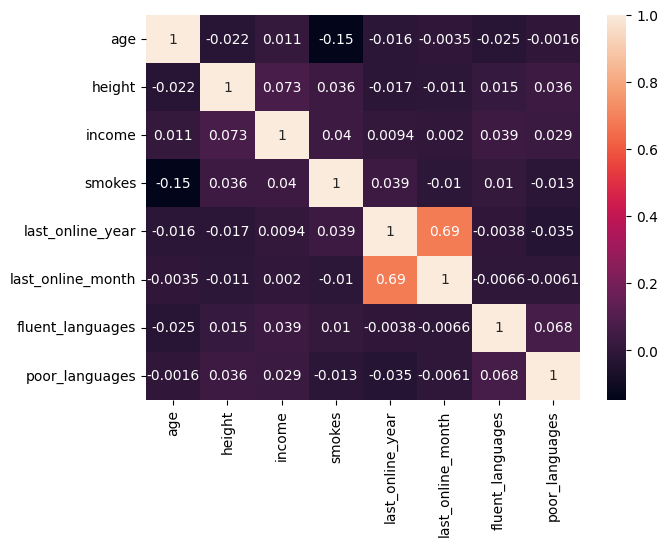

In [62]:
ax = plt.subplots(figsize = (7,5))
sns.heatmap(df.corr(numeric_only=True),annot = True);

# 1) Can your dating profile predict your age?

In [63]:
df_reg=pd.get_dummies(df,drop_first=True)

In [64]:
df_reg.sample(5)

,age,height,income,smokes,last_online_year,last_online_month,fluent_languages,poor_languages,body_type_Endomorph,body_type_Mesomorph,diet_halal,diet_kosher,diet_other,diet_vegan,diet_vegetarian,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,drinks_very often,drugs_often,drugs_sometimes,education_graduated,education_student,location_albany,location_atherton,location_belmont,location_belvedere tiburon,location_benicia,location_berkeley,location_billings,location_bolinas,location_boulder,location_brisbane,location_burlingame,location_canyon country,location_castro valley,location_corte madera,location_crockett,location_daly city,location_east palo alto,location_el cerrito,location_el granada,location_el sobrante,location_emeryville,location_fairfax,location_foster city,location_freedom,location_fremont,location_glencove,...,location_tucson,location_vallejo,location_walnut creek,location_west oakland,location_westlake,location_woodacre,location_woodbridge,location_woodside,offspring_1,orientation_gay,orientation_straight,pets_dislikes dogs,pets_dislikes dogs and dislikes cats,pets_dislikes dogs and has cats,pets_dislikes dogs and likes cats,pets_has cats,pets_has dogs,pets_has dogs and dislikes cats,pets_has dogs and has cats,pets_has dogs and likes cats,pets_likes cats,pets_likes dogs,pets_likes dogs and dislikes cats,pets_likes dogs and has cats,pets_likes dogs and likes cats,religion_atheism,religion_buddhism,religion_catholicism,religion_christianity,religion_hinduism,religion_islam,religion_judaism,religion_other,sex_m,sign_aries,sign_cancer,sign_capricorn,sign_gemini,sign_leo,sign_libra,sign_pisces,sign_sagittarius,sign_scorpio,sign_taurus,sign_unknown,sign_virgo,status_seeing someone,status_single,generation_Gen X-er,generation_Millennial
5539,32.0,68.0,-1.0,0,12,6,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
5388,30.0,68.0,-1.0,0,12,6,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
4235,42.0,65.0,-1.0,0,12,6,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
9227,32.0,68.0,-1.0,1,12,6,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
8756,46.0,68.0,50000.0,0,12,6,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0


In [65]:
x,y=df_reg.drop("age",axis=1),df[["age"]]

In [66]:
def regression_funct(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor

    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()

    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor',
                'GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]

    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)

    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))

    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae

    return result.sort_values('R_Squared',ascending=False)

In [67]:
regression_funct(x,y)

,R_Squared,RMSE,MAE
GradientBoostingRegressor,0.851458,3.674272,2.999143
Ridge,0.842792,3.779932,3.067970
LinearRegression,0.841782,3.792046,3.073573
ExtraTreeRegressor,0.684435,5.355380,4.206858
Lasso,0.571226,6.242524,4.215691
KNeighborsRegressor,0.432975,7.178718,4.887231
ElasticNet,0.304001,7.953354,5.442522


In [68]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)

In [70]:
R=Ridge()
regmodel = R.fit(x_train,y_train)

In [71]:
y_pretest = regmodel.predict(x_test)

In [72]:
(mean_squared_error(y_test,y_pretest))**0.5

3.7799318342893513

In [73]:
r2_score(y_test,y_pretest)

0.8427915343671959

## Feature Importance

In [74]:
feature_importence=pd.DataFrame({'Feature': x_train.columns, 'Coefs':R.coef_[0]})

In [75]:
feature_importence=feature_importence.sort_values(by='Coefs', ascending=False)

In [76]:
feature_importence

,Feature,Coefs
36,location_corte madera,3.928906e+00
114,pets_dislikes dogs,3.325976e+00
106,location_west oakland,2.589033e+00
30,location_bolinas,2.500325e+00
39,location_east palo alto,2.279692e+00
57,location_larkspur,2.107280e+00
85,location_san anselmo,2.073082e+00
48,location_glencove,1.957692e+00
44,location_fairfax,1.794635e+00
87,location_san carlos,1.782667e+00


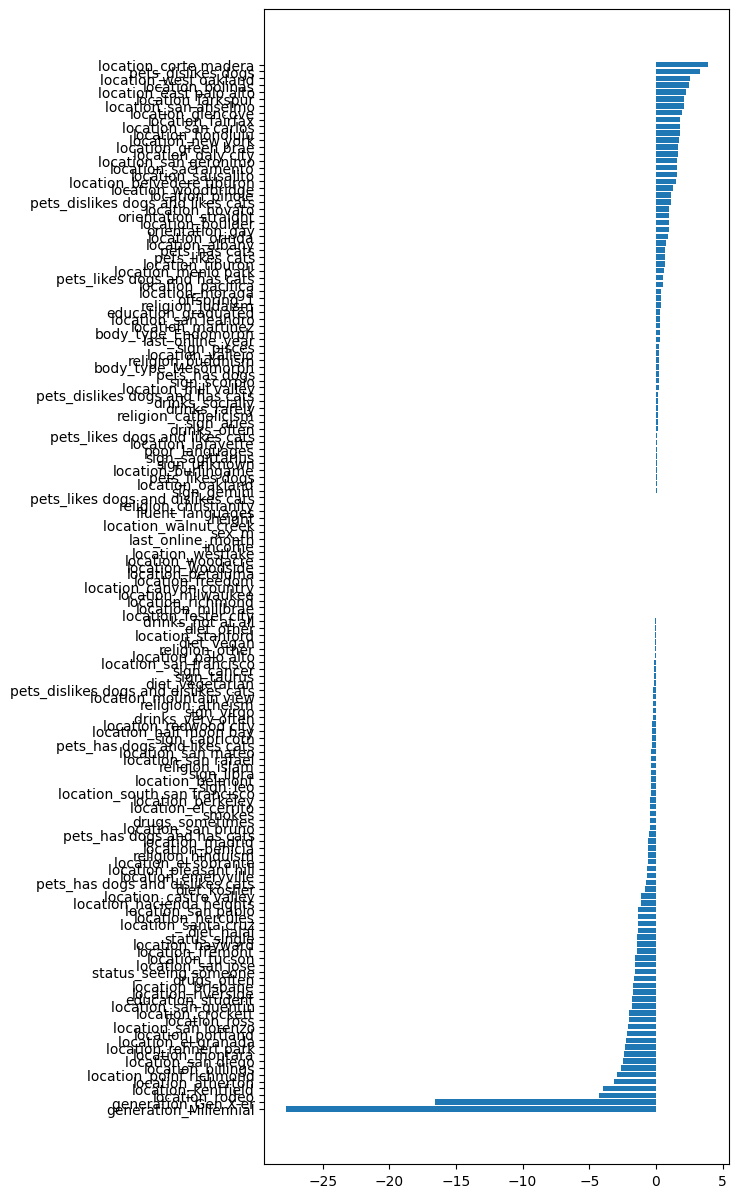

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,15))
plt.barh(feature_importence['Feature'],feature_importence['Coefs'])
plt.gca().invert_yaxis()

In [78]:
residuals = y_test - y_pretest

In [79]:
residuals

,age
4220,4.931902
4694,-5.575256
6678,-0.496595
4730,4.990016
9289,6.721791
2882,1.089125
1569,-0.841674
733,-3.766679
1400,-0.195441
2697,-2.168337


<Axes: ylabel='Count'>

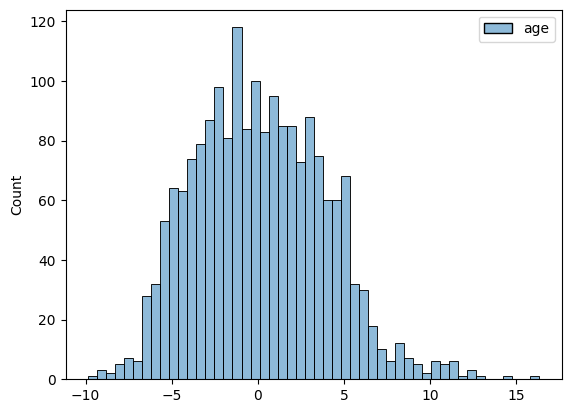

In [80]:
sns.histplot(residuals, bins=50)

# 2) Can your dating profile predict the generation you belong to?

In [81]:
# epoch had some integer problem that i changed epoch string to integer
df.loc[df['generation']== 'Boomers','generation_num']=2
df.loc[df['generation']== 'Gen X-er','generation_num']=1
df.loc[df['generation']== 'Millennial','generation_num']=0
df['generation_num'] = df['generation_num'].astype('int')
df.head()

,age,body_type,diet,drinks,drugs,education,height,income,location,offspring,orientation,pets,religion,sex,sign,smokes,status,last_online_year,last_online_month,fluent_languages,poor_languages,generation,generation_num
0,22.0,Endomorph,anything,socially,never,student,75.0,-1.0,south san francisco,1,straight,likes dogs and likes cats,agnosticism,m,gemini,1,single,12,6,1,0,Millennial,0
1,35.0,Ectomorph,other,often,sometimes,student,70.0,80000.0,oakland,1,straight,likes dogs and likes cats,agnosticism,m,cancer,0,single,12,6,1,2,Gen X-er,1
2,38.0,Ectomorph,anything,socially,never,graduated,68.0,-1.0,san francisco,0,straight,has cats,other,m,pisces,0,single,12,6,1,0,Gen X-er,1
3,23.0,Ectomorph,vegetarian,socially,never,student,71.0,20000.0,berkeley,1,straight,likes cats,other,m,pisces,0,single,12,6,1,1,Millennial,0
4,29.0,Mesomorph,anything,socially,never,graduated,66.0,-1.0,san francisco,0,straight,likes dogs and likes cats,other,m,aquarius,0,single,12,6,1,0,Millennial,0


In [82]:
df.drop("generation",axis=1,inplace=True)
df.head()

,age,body_type,diet,drinks,drugs,education,height,income,location,offspring,orientation,pets,religion,sex,sign,smokes,status,last_online_year,last_online_month,fluent_languages,poor_languages,generation_num
0,22.0,Endomorph,anything,socially,never,student,75.0,-1.0,south san francisco,1,straight,likes dogs and likes cats,agnosticism,m,gemini,1,single,12,6,1,0,0
1,35.0,Ectomorph,other,often,sometimes,student,70.0,80000.0,oakland,1,straight,likes dogs and likes cats,agnosticism,m,cancer,0,single,12,6,1,2,1
2,38.0,Ectomorph,anything,socially,never,graduated,68.0,-1.0,san francisco,0,straight,has cats,other,m,pisces,0,single,12,6,1,0,1
3,23.0,Ectomorph,vegetarian,socially,never,student,71.0,20000.0,berkeley,1,straight,likes cats,other,m,pisces,0,single,12,6,1,1,0
4,29.0,Mesomorph,anything,socially,never,graduated,66.0,-1.0,san francisco,0,straight,likes dogs and likes cats,other,m,aquarius,0,single,12,6,1,0,0


In [83]:
y=df[["generation_num"]]

In [84]:
df_class=df.drop(["generation_num","age"] ,axis=1)
x=pd.get_dummies(df_class,drop_first=True)

In [98]:
x.head()

,height,income,smokes,last_online_year,last_online_month,fluent_languages,poor_languages,body_type_Endomorph,body_type_Mesomorph,diet_halal,diet_kosher,diet_other,diet_vegan,diet_vegetarian,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,drinks_very often,drugs_often,drugs_sometimes,education_graduated,education_student,location_albany,location_atherton,location_belmont,location_belvedere tiburon,location_benicia,location_berkeley,location_billings,location_bolinas,location_boulder,location_brisbane,location_burlingame,location_canyon country,location_castro valley,location_corte madera,location_crockett,location_daly city,location_east palo alto,location_el cerrito,location_el granada,location_el sobrante,location_emeryville,location_fairfax,location_foster city,location_freedom,location_fremont,location_glencove,location_green brae,...,location_stanford,location_tiburon,location_tucson,location_vallejo,location_walnut creek,location_west oakland,location_westlake,location_woodacre,location_woodbridge,location_woodside,offspring_1,orientation_gay,orientation_straight,pets_dislikes dogs,pets_dislikes dogs and dislikes cats,pets_dislikes dogs and has cats,pets_dislikes dogs and likes cats,pets_has cats,pets_has dogs,pets_has dogs and dislikes cats,pets_has dogs and has cats,pets_has dogs and likes cats,pets_likes cats,pets_likes dogs,pets_likes dogs and dislikes cats,pets_likes dogs and has cats,pets_likes dogs and likes cats,religion_atheism,religion_buddhism,religion_catholicism,religion_christianity,religion_hinduism,religion_islam,religion_judaism,religion_other,sex_m,sign_aries,sign_cancer,sign_capricorn,sign_gemini,sign_leo,sign_libra,sign_pisces,sign_sagittarius,sign_scorpio,sign_taurus,sign_unknown,sign_virgo,status_seeing someone,status_single
0,75.0,-1.0,1,12,6,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,70.0,80000.0,0,12,6,1,2,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,68.0,-1.0,0,12,6,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,71.0,20000.0,0,12,6,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,66.0,-1.0,0,12,6,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [99]:
def classification_funct(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier

    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC()
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()

    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier',
                'RandomForestClassifier','LogisticRegression','XGBClassifier']

    accuracy_scored=[]


    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)

        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))

    result=pd.DataFrame(columns=['accuracy_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [102]:
classification_funct(x,y)

,accuracy_score
XGBClassifier,0.648450
SVC,0.647399
BernoulliNB,0.644771
GaussianNB,0.642144
LogisticRegression,0.642144
RandomForestClassifier,0.641618
KNeighborsClassifier,0.612717
DecisionTreeClassifier,0.547031
